#### Lightweight Genetic Algorithm

- No tournament selection (only takes the best 2 individuals)
- Random crossover points
- Less precise evaluation function
- Takes more or less 2 minutes to each optimum
- Only libraries needed: 

In [1]:
import numpy as np
import random

In [2]:
group_size = 3

students = [
    {'id':1, 'name':'alexandra','gender':'f', 'location':'online', 'language':'german'},
    {'id':2, 'name':'josie','gender':'f', 'location':'onsite', 'language':'english'},
    {'id':3, 'name':'laurel','gender':'f', 'location':'online', 'language':'both'},
    {'id':4, 'name':'bob','gender':'m', 'location':'onsite', 'language':'german'},
    {'id':5, 'name':'justin','gender':'m', 'location':'online', 'language':'german'},
    {'id':6, 'name':'aaron','gender':'m', 'location':'online', 'language':'english'},
    {'id':7, 'name':'frances','gender':'f', 'location':'onsite', 'language':'english'},
    {'id':8, 'name':'sally','gender':'f', 'location':'onsite', 'language':'both'},
    {'id':9, 'name':'claire','gender':'f', 'location':'online', 'language':'english'},
    {'id':10, 'name':'carol','gender':'f', 'location':'onsite', 'language':'both'},
    {'id':11, 'name':'lauren','gender':'f', 'location':'online', 'language':'german'},
    {'id':12, 'name':'nora','gender':'f', 'location':'onsite', 'language':'english'},
    {'id':13, 'name':'charlotte','gender':'f', 'location':'online', 'language':'both'},
    {'id':14, 'name':'camille','gender':'f', 'location':'onsite', 'language':'both'},
    {'id':15, 'name':'ben','gender':'m', 'location':'onsite', 'language':'german'},           
    {'id':16, 'name':'dan','gender':'m', 'location':'online', 'language':'english'},
    {'id':17, 'name':'harold','gender':'m', 'location':'online', 'language':'english'},
    {'id':18, 'name':'evelyn','gender':'f', 'location':'online', 'language':'both'},
    {'id':19, 'name':'leigh-ann','gender':'f', 'location':'onsite', 'language':'both'},
    {'id':20, 'name':'melissa','gender':'f', 'location':'online', 'language':'german'},  
    {'id':21, 'name':'brian','gender':'m', 'location':'onsite', 'language':'english'},
    ]

Random population

In [3]:
def generate_population(students, groupsize):

    students_copy = students.copy()

    arr = np.zeros(shape=(int(len(students_copy)/group_size), group_size, 1), dtype=int)

    for i in range(0,len(arr)):
        for j in range(0,groupsize):
            x = random.choice(students_copy)
            arr[i][j] = x['id']
            students_copy.remove(x)
    return arr

In [4]:
population = generate_population(students, group_size)
population

array([[[14],
        [17],
        [ 1]],

       [[21],
        [ 7],
        [15]],

       [[ 3],
        [19],
        [20]],

       [[12],
        [ 2],
        [ 9]],

       [[10],
        [16],
        [ 4]],

       [[13],
        [11],
        [ 5]],

       [[18],
        [ 8],
        [ 6]]])

In [5]:
len(set(population.flatten()))

21

In [6]:
def show_population(array, students):
    for n,i in enumerate(array): 
        print('\nGroup:' ,n+1)
        for j in i:
            for k in students:
                if k['id'] == int(j[0]):
                    print(k['name'])

In [7]:
show_population(population, students)


Group: 1
camille
harold
alexandra

Group: 2
brian
frances
ben

Group: 3
laurel
leigh-ann
melissa

Group: 4
nora
josie
claire

Group: 5
carol
dan
bob

Group: 6
charlotte
lauren
justin

Group: 7
evelyn
sally
aaron


Evaluation: 

* Group has to be mixed with atleast one female and one male
* Group has to have the same language
* Group has to work in same location
* Group has to have the same language or people that speak both languages

In [8]:
def evaluate(array, students):

    total = []
    for i in array:
        local = 0
        gender = []
        location = []
        langauge = []
        for j in i: # Group
            for k in students:
                if k['id'] == int(j[0]):
                    
                    gender.append(k['gender'])
                    location.append(k['location'])
                    langauge.append(k['language'])

        if gender.count('m') <= 2 or gender.count('f') <= 2:
            local += 1

        if len(set(location)) == 1:
            local += 1

        if len(set(langauge)) == 1:
            local += 1

        total.append(local)

    return sum(total)

In [9]:
evaluate(population, students)

10

Selection and getting Parents

In [10]:
def get_parents(scores, total_population):

    parents = []

    max_score = max(scores)
    max_index = scores.index(max_score)
    parents.append(total_population[max_index])
    scores.remove(max_score)

    max_score = max(scores)
    max_index = scores.index(max_score)
    parents.append(total_population[max_index])
    scores.remove(max_score)

    return parents

In [11]:
dummy_populations = [generate_population(students, group_size) for i in range(0,10)]
dummy_scores = [evaluate(i, students) for i in dummy_populations]

In [12]:
a,b = get_parents(dummy_scores, dummy_populations)

Reproduction (and Mutation)

In [13]:
def crossover(parent1, parent2):

    if len(parent1) != len(parent2):
        print('Parents are not the same length')
        return
    
    child = np.zeros_like(parent1)

    while len(set(child.flatten())) != len(parent1.flatten()): # This takes a lot of time in the beginning
                                                               # but gets faster later on
        for i in range(0,len(parent1)):
            for j in range(0,len(parent1[i])):
                if random.random() < 0.5:
                    child[i][j] = parent1[i][j]
                else:
                    child[i][j] = parent2[i][j]


    child = np.array(child)
    child = np.reshape(child, newshape=(len(parent1), 3, 1))

    return child

In [14]:
def mutation(array, rate):

    if random.uniform(0, 1) < rate:
        
        number1 = random.randint(1,len(array)*group_size)
        number2 = random.randint(1,len(array)*group_size)

        while number1 == number2:
            number2 = random.randint(1,len(array)*group_size)
        
        mutation_location1 = np.argwhere(array == [number1])
        mutation_location2 = np.argwhere(array == [number2])

        """ print(mutation_location1, mutation_location2)
        print('Numbers:', number1, number2)
        print('Location1:', array[mutation_location1[0][0]][mutation_location1[0][1]])
        print('Location2:', array[mutation_location2[0][0]][mutation_location2[0][1]])
        print('----') """

        array[mutation_location2[0][0]][mutation_location2[0][1]] = number1
        array[mutation_location1[0][0]][mutation_location1[0][1]] = number2

    return array


In [15]:
def delete_lowest(array, scores):

    lowest_score = min(scores)
    lowest_index = scores.index(lowest_score)
    array.pop(lowest_index)
    scores.pop(lowest_index)

    return array, scores

The full algorithm

In [16]:
def genetic_algorithm(n_populations, students, group_size, mutation_rate):

    history = []
    scores = []
    parents = []
    iterations = 0
    score = 0

    total_population = [generate_population(students, group_size) for _ in range(0,n_populations)]

    while score < 19: # Best possible score is 18

        scores = [evaluate(i, students) for i in total_population]
        parents = get_parents(scores, total_population)
        child = crossover(parents[0], parents[1])
        
        child = mutation(child, mutation_rate)
        total_population.append(child)

        scores.append(evaluate(child, students))
        history.append(np.mean(scores))
        total_population, scores = delete_lowest(total_population, scores)

        score = max(scores)
        iterations += 1
        print(f'Iteration: {iterations} - score: {score}')

    best_group = total_population[scores.index(max(scores))]

    return best_group, history

In [17]:
best_group, history = genetic_algorithm(100, students, group_size, 0.05)

Iteration: 1 - score: 11
Iteration: 2 - score: 13
Iteration: 3 - score: 12
Iteration: 4 - score: 12
Iteration: 5 - score: 12
Iteration: 6 - score: 12
Iteration: 7 - score: 12
Iteration: 8 - score: 12
Iteration: 9 - score: 12
Iteration: 10 - score: 12
Iteration: 11 - score: 12
Iteration: 12 - score: 12
Iteration: 13 - score: 12
Iteration: 14 - score: 12
Iteration: 15 - score: 13
Iteration: 16 - score: 13
Iteration: 17 - score: 13
Iteration: 18 - score: 13
Iteration: 19 - score: 13
Iteration: 20 - score: 13
Iteration: 21 - score: 13
Iteration: 22 - score: 13
Iteration: 23 - score: 13
Iteration: 24 - score: 13
Iteration: 25 - score: 13
Iteration: 26 - score: 13
Iteration: 27 - score: 13
Iteration: 28 - score: 13
Iteration: 29 - score: 13
Iteration: 30 - score: 13
Iteration: 31 - score: 13
Iteration: 32 - score: 13
Iteration: 33 - score: 13
Iteration: 34 - score: 13
Iteration: 35 - score: 13
Iteration: 36 - score: 13
Iteration: 37 - score: 13
Iteration: 38 - score: 13
Iteration: 39 - score

KeyboardInterrupt: 

In [ ]:
print('\nBest group:')
show_population(best_group, students)


Best group:

Group: 1
harold
claire
camille

Group: 2
leigh-ann
aaron
charlotte

Group: 3
josie
dan
brian

Group: 4
ben
alexandra
nora

Group: 5
laurel
evelyn
bob

Group: 6
justin
lauren
melissa

Group: 7
sally
carol
frances


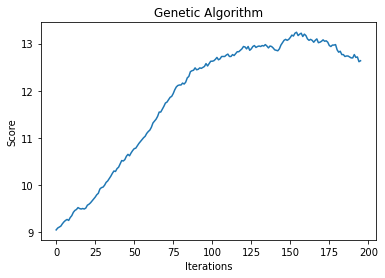

In [ ]:
import matplotlib.pyplot as plt

plt.title('Genetic Algorithm')
plt.plot(history)
plt.xlabel('Iterations')
plt.ylabel('Mean Score')
plt.show()